Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-232.698,-242.329,1.71732e-72
2,140.151,4.0,-229.777,-239.394,3.23189e-71
3,140.302,4.0,-226.885,-236.488,5.91153e-70
4,140.452,4.0,-224.021,-233.61,1.05095e-68
5,140.603,4.0,-221.186,-230.76,1.81593e-67
6,140.754,4.0,-218.379,-227.939,3.04969e-66
7,140.905,4.0,-215.6,-225.147,4.97795e-65
8,141.055,4.0,-212.85,-222.383,7.89737e-64
9,141.206,4.0,-210.128,-219.647,1.21773e-62


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,156.734,7.45729,-68.8742,-77.2662,0.833292
2,157.035,7.8593,-69.0243,-77.4004,0.728637
3,154.925,7.37688,-68.7138,-77.206,0.884971
4,154.02,8.34171,-69.1988,-77.7443,0.516608
5,155.528,6.97487,-68.7364,-77.1943,0.895401
6,154.774,6.41206,-69.3184,-77.8194,0.479247
7,154.623,8.1005,-68.8892,-77.399,0.729696
8,156.734,7.9397,-68.9129,-77.3049,0.80167
9,153.719,10.3518,-70.669,-79.2326,0.116625


### Snippet 4.23

Density of sigma

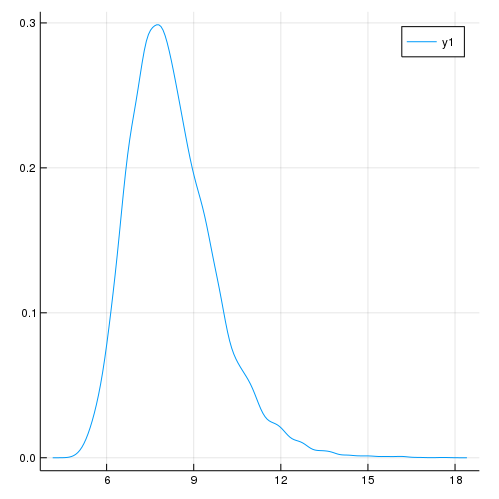

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*